# Implementing Moving Average on Time Series Data

### Simple Moving Average (SMA)

First, let's create dummy time series data and try implementing SMA using just Python.

Assume that there is a demand for a product and it is observed for 12 months (1 Year), and you need to find moving averages for 3 and 4 months window periods.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}

In [3]:
df = pd.DataFrame(product)

In [4]:

df.head()

,month,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


Let's calculate SMA for a window size of 3, which means you will consider three values each time to calculate the moving average, and for every new value, the oldest value will be ignored.

In [15]:
# create a new column with a 3sma
df['SMA_3'] = df['demand'].rolling(3).mean()

In [16]:
df.head()

,month,demand,SMA_3
0,1,290,NaN
1,2,260,NaN
2,3,288,279.333333
3,4,300,282.666667
4,5,310,299.333333


Cool, so as you can see, the custom and pandas moving averages match exactly, which means your implementation of SMA was correct.

Let's also quickly calculate the simple moving average for a window_size of 4.

In [18]:
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'SMA_4'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1])/4),1)

In [19]:
df.head()

,month,demand,SMA_3,SMA_4
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,279.333333,NaN
3,4,300,282.666667,284.5
4,5,310,299.333333,289.5


In [20]:
df['pandas_SMA_4'] = df.iloc[:,1].rolling(window=4).mean()

In [21]:
df.head()

,month,demand,SMA_3,SMA_4,pandas_SMA_4
0,1,290,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN
2,3,288,279.333333,NaN,NaN
3,4,300,282.666667,284.5,284.5
4,5,310,299.333333,289.5,289.5


Now, you will plot the data of the moving averages.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

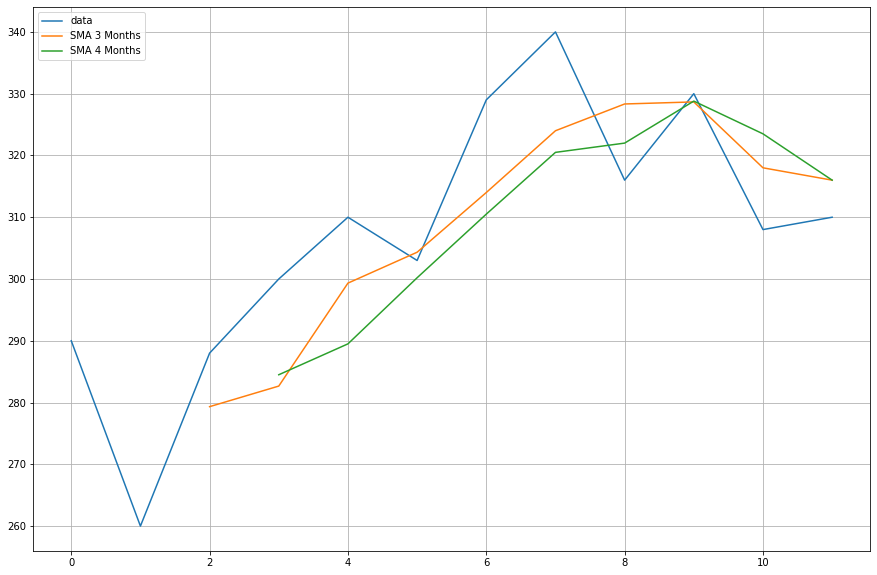

In [25]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['demand'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

### Cumulative Moving Average

For cumulative moving average, I will use the air quality dataset.

In [31]:
# Extract the data and print out the first few rows
weather_data = pd.read_csv("datasets/MovingAverage/AirQualityUCI.csv")
weather_data.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


As you can see the data is seperated with a semicolons so we must set the sep arguemnt equal to a semicolon and the decimal point is actually a comma we can fix this by setting the decimal arguement equal to ,

In [38]:
df = pd.read_csv("datasets/MovingAverage/AirQualityUCI.csv", sep = ";", decimal = ",")
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


Preprocessing is an essential step whenever you are working with data. For numerical data one of the most common preprocessing steps is to check for NaN (Null) values. If there are any NaN values, you can replace them with either 0 or average or preceding or succeeding values or even drop them. Though replacing is normally a better choice over dropping them, since this dataset has few NULL values, dropping them will not affect the continuity of the series.

In [ ]:
df.isna().sum()

From the above output, you can observe that there are around 114 NaN values across all columns, however you will figure out that they are all at the end of the time-series, so let's quickly drop them.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

You will be applying cumulative moving average on the Temperature column (T), so let's quickly separate that column out from the complete data.

In [ ]:
df_T = pd.DataFrame(df.iloc[:,-2])

In [ ]:
df_T.head()

Now, you will use the pandas expanding method fo find the cumulative average of the above data. If you recall from the introduction, unlike the simple moving average, the cumulative moving average considers all of the preceding values when calculating the average.

In [ ]:
df_T['CMA_4'] = df_T.expanding(min_periods=4).mean()

In [ ]:
df_T.head(10)

Time series data is plotted with respect to the time, so let's combine the date and time column and convert it into a datetime object. To achieve this, you will use the datetime module from python (Source: Time Series Tutorial).

In [ ]:
import datetime

df['DateTime'] = (df.Date) + ' ' + (df.Time)
df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))

In [ ]:
df.head()

Let's change the index of the temperature dataframe with datetime.

In [ ]:
df_T.index = df.DateTime

In [ ]:
df_T.head()

Let's now plot the actual temperature and the cumulative moving average wrt. time.

In [ ]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_T['T'],label='temperature')
plt.plot(df_T['CMA_4'],label='CMA_4')
plt.legend(loc=2)

### Exponential Moving Average

In [ ]:
df_T['EMA'] = df_T.iloc[:,0].ewm(span=40,adjust=False).mean()

In [ ]:
df_T.head()

In [ ]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_T['T'],label='temperature')
plt.plot(df_T['CMA_4'],label='CMA_4')
plt.plot(df_T['EMA'],label='EMA')
plt.legend(loc=2)

In [ ]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [ ]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()
dfcomp = web.DataReader('AAPL', 'yahoo', start=start, end=end)

In [ ]:
dfcomp.head()

In [ ]:
close_px = dfcomp['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [ ]:
mavg.tail()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()